In [76]:
import numpy as np             
import pandas as pd           #Python Data Analysis Library handle data in a user friendly way
#import random
import matplotlib.pyplot as plt #for plots
%matplotlib inline
from sklearn import linear_model # A very popular Python library for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split #needed to for assessing prediction
from sklearn import datasets ## imports datasets from scikit-learn
import scipy as sc



## Rigdge Regression Model with standardized data

### Petrol_Fraction = Petrol/Total_Cars

In [61]:
data = pd.read_csv('data/GB_all_data - Copy 2.csv')
#data = pd.read_csv('data/GB_all_data.csv')
data = data.set_index('Year')
#data['Petrol_Fraction'] = (data['Petrol']+data['Diesel']+data['Gas']+data['Other'])/data['Total Vehicles']
#fraction = data['Petrol_Fraction'].copy()
data.head(3)

,Average_CO2,Petrol,Diesel,Total_Vehicles,UK_Population,Petrol_Fraction,Total_GHGs,Low_Emission_Total,LE_Fraction,New_Petrol,New_Diesel,New_Total,All_Electric
Year,,,,,,,,,,,,,
1994,0.0,19620898,1576196,21199203,57943000,0.925549,113648.313,0,0.0,0,0,0,100
1995,0.0,19499763,1891271,21394103,58095000,0.911455,112645.659,0,0.0,0,0,0,100
1996,0.0,20051602,2181634,22237538,58239000,0.901701,116737.339,0,0.0,0,0,0,100


In [84]:
data = data.dropna()
data.head(3)

,Average_CO2,Petrol,Diesel,Total_Vehicles,UK_Population,Petrol_Fraction,Total_GHGs,Low_Emission_Total,LE_Fraction,New_Petrol,New_Diesel,New_Total,All_Electric
Year,,,,,,,,,,,,,
1994,0.0,19620898,1576196,21199203,57943000,0.925549,113648.313,0,0.0,0,0,0,100
1995,0.0,19499763,1891271,21394103,58095000,0.911455,112645.659,0,0.0,0,0,0,100
1996,0.0,20051602,2181634,22237538,58239000,0.901701,116737.339,0,0.0,0,0,0,100


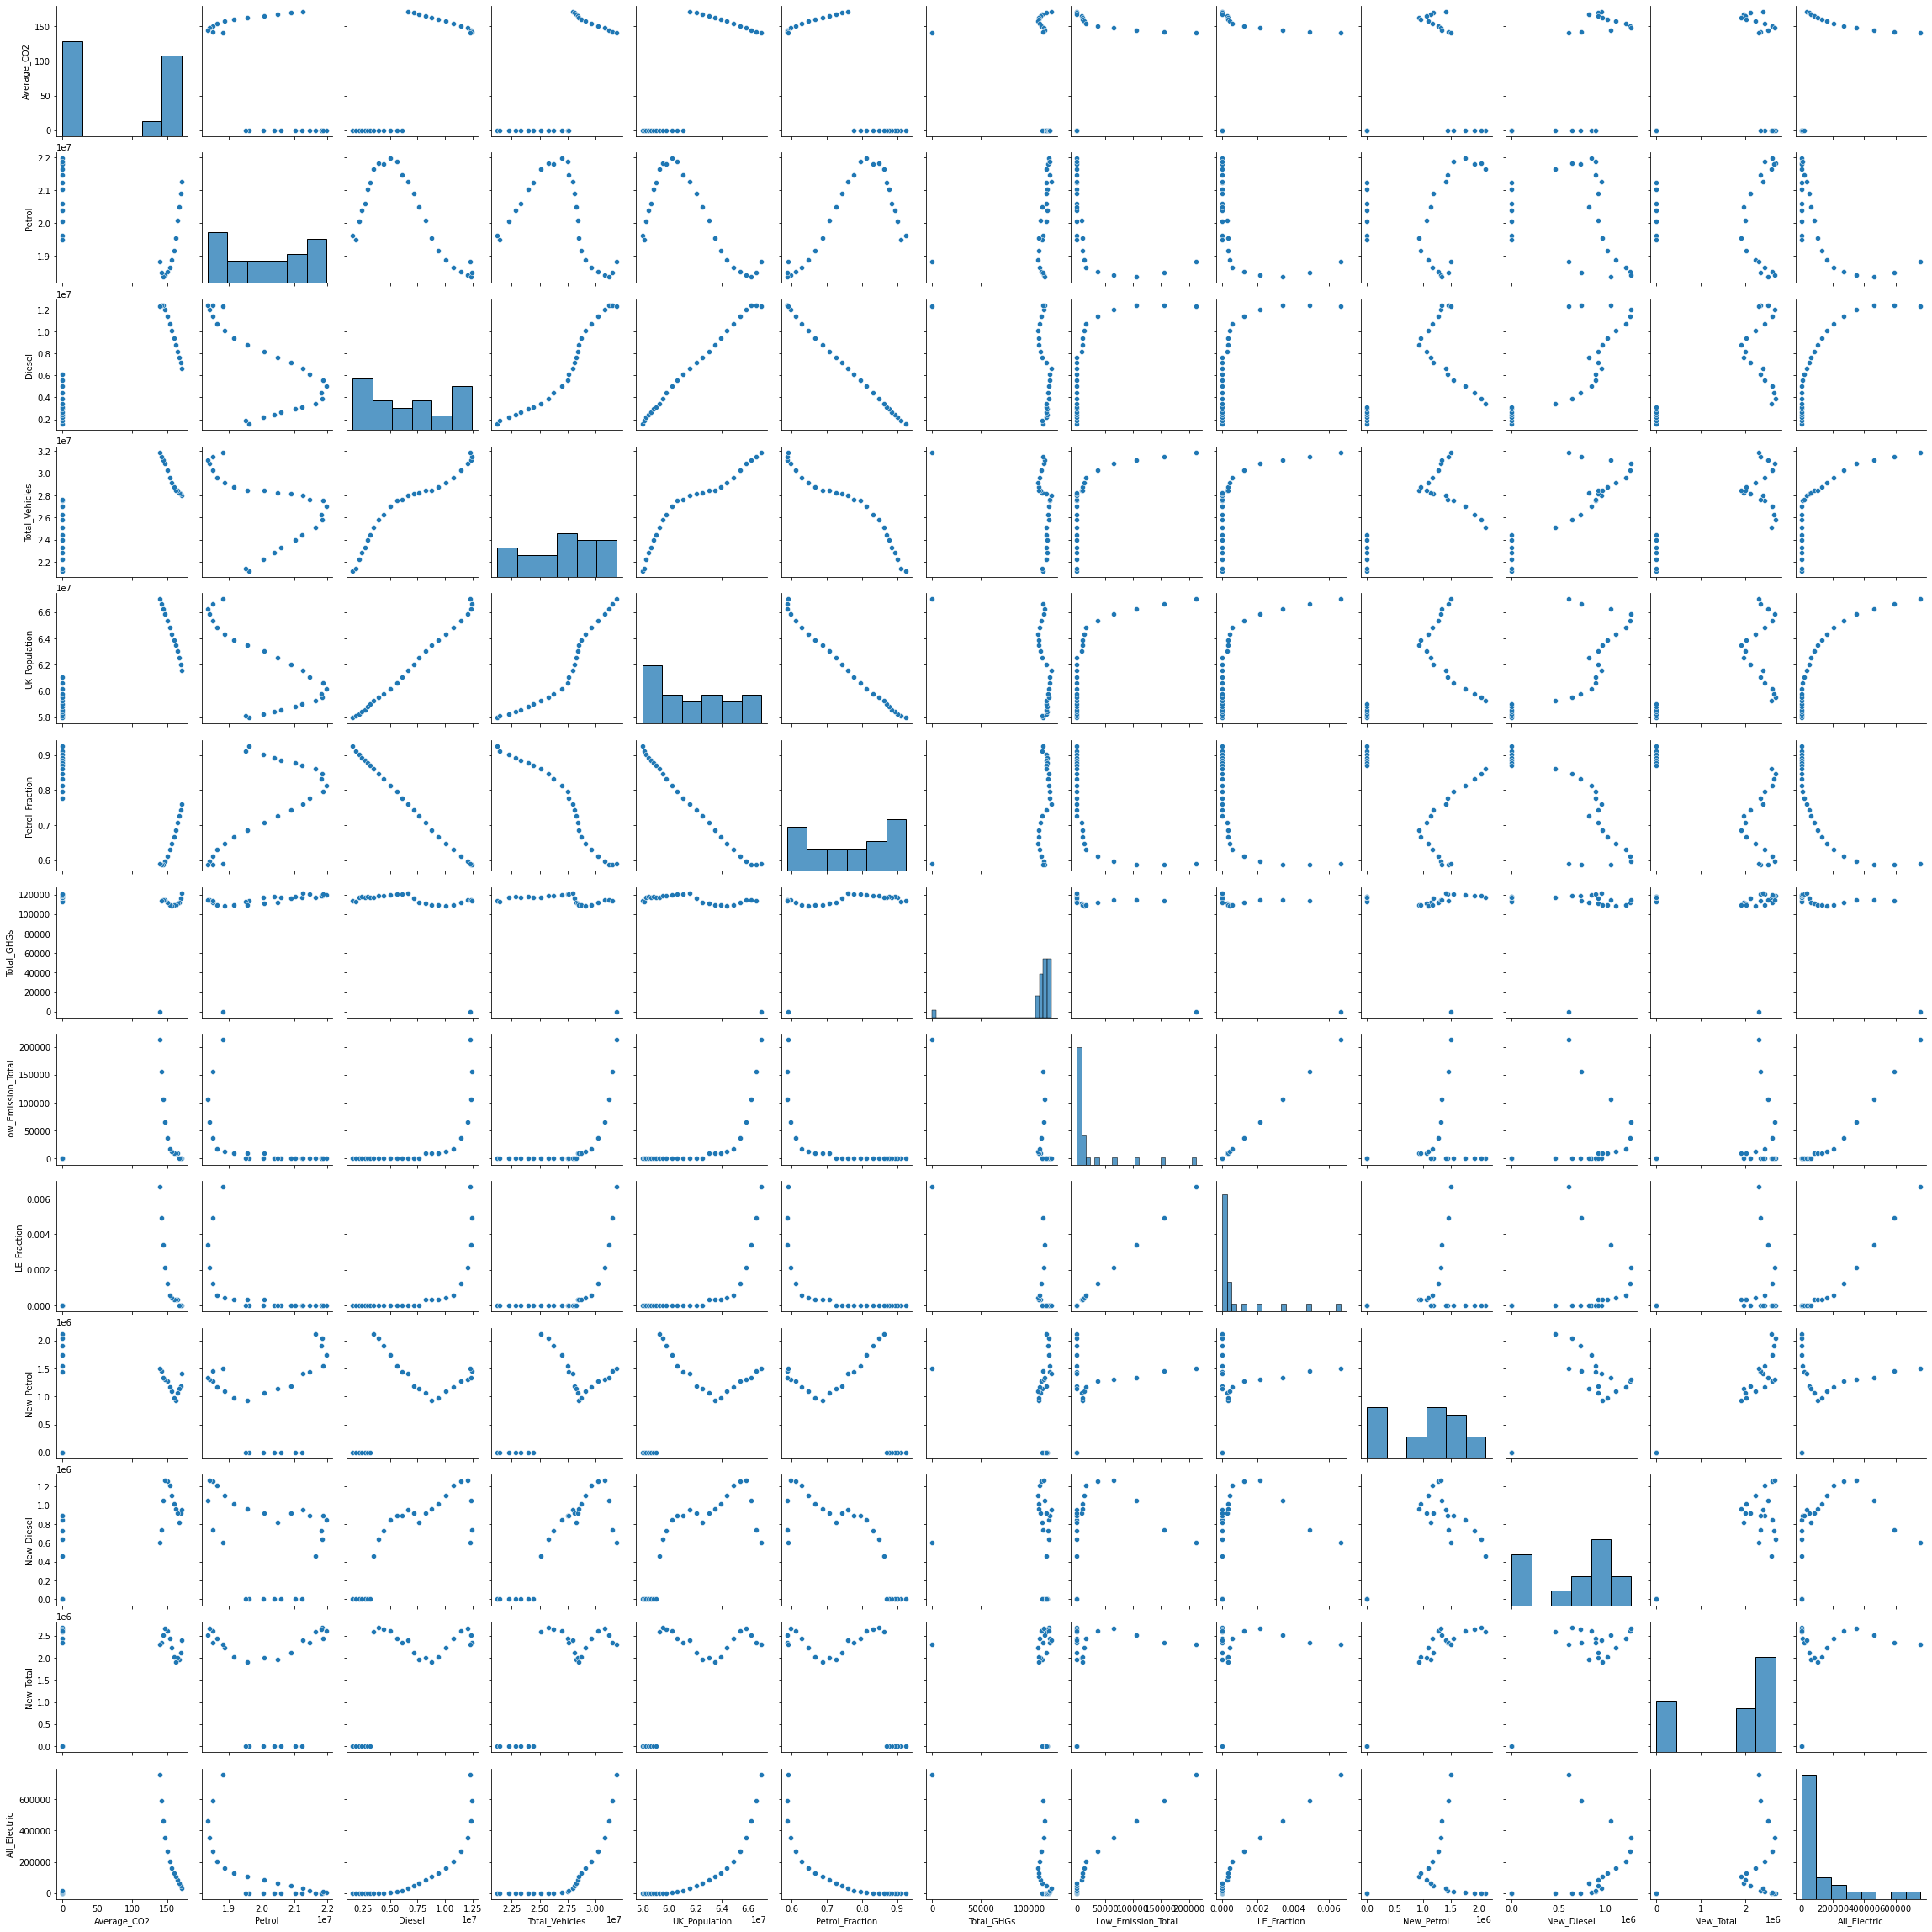

In [82]:
import seaborn as sns
sns.pairplot(data)

In [26]:
mat = np.array([data['Total_GHGs'], data['Total_Vehicles'], data['Petrol_Fraction']])

In [32]:
std_mat = np.std(mat, axis = 1)

In [50]:
mean_mat = np.mean(mat, axis = 1)


[[ 2.81176688e+03  1.80911288e+03  5.90079288e+03  7.22888988e+03
   6.41424988e+03  7.21622588e+03  6.30073188e+03  6.14003088e+03
   8.40214988e+03  7.93749788e+03  9.00820588e+03  9.68531688e+03
   9.64062688e+03  1.08654259e+04  5.57616388e+03  1.40152588e+03
   6.28738846e+01 -1.41979712e+03 -1.75197312e+03 -2.57560012e+03
  -1.09676912e+03  1.13729988e+03  3.74862588e+03  3.94941888e+03
   2.44375288e+03 -1.10836546e+05]
 [-5.84386131e+06 -5.64896131e+06 -4.80552631e+06 -4.21136631e+06
  -3.74973231e+06 -3.06812731e+06 -2.63751531e+06 -1.91719731e+06
  -1.26113331e+06 -8.02660308e+05 -1.49653077e+04  4.77333692e+05
   5.66106692e+05  9.57199692e+05  1.11763769e+06  1.20340569e+06
   1.37781269e+06  1.42422469e+06  1.67938869e+06  2.09787269e+06
   2.56842469e+06  3.20722969e+06  3.80737569e+06  4.15711769e+06
   4.47453269e+06  4.84538369e+06]
 [ 1.66876559e-01  1.52782747e-01  1.43028336e-01  1.34152717e-01
   1.25294629e-01  1.18536102e-01  1.11311578e-01  1.02625031e-01
   8.8

In [39]:
mat_stand = (mat-mean_mat.reshape(-1,1))/std_mat.reshape(-1,1)

In [51]:
print(std_mat.reshape(-1,1))

[[2.24944970e+04]
 [3.10521428e+06]
 [1.14606335e-01]]


In [45]:
standard_data = pd.DataFrame(mat_stand.T, index = data.index, 
                             columns = ['Total_GHGs', 'Total_Vehicles', 'Petrol_Fraction'])

In [47]:
standard_data.head(3)

,Total_GHGs,Total_Vehicles,Petrol_Fraction
Year,,,
1994,0.124998,-1.881951,1.456085
1995,0.080425,-1.819186,1.333109
1996,0.262322,-1.547567,1.247997


In [58]:
predictors = ['Total_Vehicles', 'Petrol_Fraction']
lam=0.001#np.exp(-100)
ridgereg = Ridge(alpha=lam,normalize=False,fit_intercept=True)
ridgereg.fit(standard_data[predictors],standard_data['Total_GHGs'])
y_pred = ridgereg.predict(standard_data[predictors])




In [65]:
#output to return
mse = np.mean((y_pred-standard_data['Total_GHGs'])**2)
results = [mse]
results.extend([ridgereg.intercept_])
results.extend(ridgereg.coef_)
col = ['MSE','intercept'] + predictors
results = pd.DataFrame([results],columns = col)
results

,MSE,intercept,Total_Vehicles,Petrol_Fraction
0,0.857927,2.776471e-16,0.027803,0.403541


## Bayesian Linear Regression

In [ ]:
# function for Bayesian Linear regression, return posterior mean and 95% CIs
def BLR(X,y,mu_0,Om_0_inv,a_0,b_0,ind_names,N):
    col_names = ['posterior mean','lower 95% bound','upper 95% bound']
    n,p = X.shape
    XtX = X.T.dot(X)
    Om_n_inv = XtX + Om_0_inv
    Om_n = sc.linalg.inv(Om_n_inv)
    term1 = Om_0_inv.dot(mu_0)+X.T.dot(y)
    mu_n = Om_n.dot(term1)
    a_n = a_0 + n/2
    term2 = y.T.dot(y)+mu_0.dot(Om_0_inv.dot(mu_0))+mu_n.dot(Om_n_inv.dot(mu_n))
    b_n = b_0 + term2/2
    sigma2 = 1/np.random.gamma(a_n, 1/b_n, N)
    betas = np.zeros((N,p))
    # draw N samples from the marginal posterior of beta
    for i in range(0,N):
        s2 =sigma2[i]
        cov = s2*Om_n
        betas[i,] = np.random.multivariate_normal(mu_n,cov,1)

    #find the mean of each column which corresponds to each beta coefficient     
    mu_beta = np.mean(betas, axis=0)
    #find the 2.5 and 97.5 percentils which correspond to each beta coefficient 
    lower95 = np.percentile(betas,2.5,axis=0)
    upper95 = np.percentile(betas,97.5,axis=0)
    results = np.column_stack([mu_beta,lower95,upper95])
    results = pd.DataFrame(results,columns = col_names,index=ind_names)
    return results, mu_n, Om_n, a_n, b_n

In [207]:
data = pd.read_csv('data/GB_all_data - Copy 2.csv')
data = data.set_index('Year')
data.head(3)

,Average_CO2,Petrol,Diesel,Total_Vehicles,UK_Population,Petrol_Fraction,Total_GHGs,Low_Emission_Total,LE_Fraction,New_Petrol,New_Diesel,New_Total,All_Electric
Year,,,,,,,,,,,,,
1994,0.0,19620898,1576196,21199203,57943000,0.925549,113648.313,0,0.0,0,0,0,100
1995,0.0,19499763,1891271,21394103,58095000,0.911455,112645.659,0,0.0,0,0,0,100
1996,0.0,20051602,2181634,22237538,58239000,0.901701,116737.339,0,0.0,0,0,0,100


In [73]:
# Standardize the Data
mat = np.array([data['Total_GHGs'], data['Total_Vehicles'], data['Petrol_Fraction']])
std_mat = np.std(mat, axis = 1)
mean_mat = np.mean(mat, axis = 1)
standard_data = pd.DataFrame(mat_stand.T, index = data.index, 
                             columns = ['Total_GHGs', 'Total_Vehicles', 'Petrol_Fraction'])


In [77]:
predictors = ['Total_Vehicles', 'Petrol_Fraction']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Total_GHGs']
n,p = X.shape

#set up prior parameters
mu_0 = np.zeros(p)
XtX = X.T.dot(X)
Om_0_inv = XtX/n #unit information prior
a_0 = 0.01
b_0 = 0.01

N=10000 #Monte Carlo sample size

results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
results

,posterior mean,lower 95% bound,upper 95% bound
Total_Vehicles,0.031797,-1.489324,1.571773
Petrol_Fraction,0.396837,-1.114855,1.952318


## Linear Regression

In [80]:
def LRST451(X,y,predictor_names):
    col_names = ['beta','se','lower 95% bound','upper 95% bound']
    XtX = X.T.dot(X)
    XtX_inv = sc.linalg.inv(X.T.dot(X))
    beta = XtX_inv.dot(X.T.dot(y))
    e = y - X.dot(beta)
    n,p = X.shape
    sigma2_hat = e.T.dot(e)/(n-p)
    var_beta = sigma2_hat*(XtX_inv)
    tval = sc.stats.t.ppf(0.975,n-p)
    se_beta = np.sqrt(np.diag(var_beta))
    lower95 = beta - sc.stats.t.ppf(0.975,n-p)*se_beta
    upper95 = beta + sc.stats.t.ppf(0.975,n-p)*se_beta
    results = np.column_stack([beta,se_beta,lower95,upper95])
    results = pd.DataFrame(results,columns = col_names,index=predictor_names)
    return results

In [81]:
#Set up model (X) and y
predictors = ['Total_Vehicles', 'Petrol_Fraction']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Total_GHGs']

results = LRST451(X,y,predictors)
results

,beta,se,lower 95% bound,upper 95% bound
Total_Vehicles,0.028010,0.681446,-1.378425,1.434446
Petrol_Fraction,0.403756,0.681446,-1.002680,1.810192


## Model Evidence

In [205]:
# Function for Bayes Model Evidence
def ModEvidence(X,y,mu_n,Om_n,mu_0,Om_0_inv,a_n,b_n,a_0,b_0): 
    beta = mu_n
    sigma2 = b_n/(a_n-1)
    Om_0 = sc.linalg.inv(Om_0_inv)
    mu = X.dot(beta)
    cov = sigma2*np.eye(X.shape[0])
    ll = sc.stats.multivariate_normal.logpdf(y,mu,cov)
    # evaluate log-prior
    lprior = a_0*np.log(b_0)-sc.special.loggamma(a_0)- (a_0+1)*np.log(sigma2)-b_0/sigma2
    lprior = lprior + sc.stats.multivariate_normal.logpdf(beta,mu_0,sigma2*Om_0)
    # evaluate log-posterior
    lpost = a_n*np.log(b_n)-sc.special.loggamma(a_n)- (a_n+1)*np.log(sigma2)-b_n/sigma2
    lpost = lpost + sc.stats.multivariate_normal.logpdf(beta,mu_n,sigma2*Om_n)
    lmodevid = ll+lprior-lpost
    return lmodevid

In [137]:
# Standardize data for simplicity
data_short = data[data.index>2009]
mat = np.array(data_short.T)
std_mat = np.std(mat, axis = 1)
mean_mat = np.mean(mat, axis = 1)
mat_stand = (mat-mean_mat.reshape(-1,1))/std_mat.reshape(-1,1)
standard_data = pd.DataFrame(mat_stand.T, index = data_short.index, 
                             columns = data.columns)


standard_data

,Average_CO2,Petrol,Diesel,Total_Vehicles,UK_Population,Petrol_Fraction,Total_GHGs,Low_Emission_Total,LE_Fraction,New_Petrol,New_Diesel,New_Total,All_Electric
Year,,,,,,,,,,,,,
2010,1.528475,2.250185,-1.706238,-1.275691,-1.582129,1.811473,0.319572,-0.797835,-0.803947,-0.793075,-0.472820,-1.211378,-1.055221
2011,1.238902,1.243361,-1.333109,-1.238362,-1.216708,1.333388,0.275277,-0.791465,-0.797042,-1.511102,-0.252907,-1.567037,-0.956979
2012,0.919675,0.509602,-0.919520,-1.033139,-0.899957,0.861703,0.265353,-0.779150,-0.784723,-1.283736,0.025209,-1.153373,-0.842981
2013,0.560042,-0.033767,-0.467735,-0.696559,-0.555395,0.394469,0.240746,-0.745282,-0.750001,-0.636595,0.443192,-0.296327,-0.702106
2014,0.188122,-0.481280,-0.024118,-0.318103,-0.167569,-0.044819,0.284927,-0.685363,-0.688575,-0.199129,0.983303,0.556722,-0.495891
2015,-0.206245,-0.709077,0.440254,0.195677,0.238799,-0.459432,0.351672,-0.389931,-0.382180,0.340005,1.175482,1.211960,-0.193287
2016,-0.596596,-0.899724,0.854951,0.678363,0.598040,-0.823665,0.429687,0.037565,0.049362,0.536242,1.219662,1.464385,0.188096
2017,-0.941460,-1.016746,1.059935,0.959654,0.902430,-1.031881,0.435685,0.627639,0.642248,0.687919,0.178950,0.840688,0.688575
2018,-1.225599,-0.731436,1.084818,1.214946,1.194458,-1.058639,0.390703,1.344329,1.352541,1.307181,-1.332275,0.169374,1.299807


In [158]:
predictors = sorted(['Petrol', 'Diesel','Total_Vehicles', 'UK_Population', 'Petrol_Fraction',
                    'Low_Emission_Total', 'LE_Fraction', 'All_Electric'])

pairs = [[a,b] for a in predictors for b in predictors if a<b]

y = standard_data['Total_GHGs']
a_0 = 0.1
b_0 = 0.1
N = 10000 #Monte Carlo sample size
#nPowers = np.array([2,3,4,5,6])
#K = nPowers.size
K = len(pairs)
Evidence = np.ones(K)

for i in range(K):
    predictors = pairs[i]
    X = standard_data[predictors]
    n,p = X.shape
    mu_0 = np.zeros(p)
    XtX = X.T.dot(X)
    Om_0_inv = XtX/n #unit information prior
    results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
    Evidence[i] = ModEvidence(X,y,mu_n,Om_n,mu_0,Om_0_inv,a_n,b_n,a_0,b_0)

-18.371577015874013 ['Petrol_Fraction', 'UK_Population']
-18.811704908841442 ['Diesel', 'Petrol_Fraction']


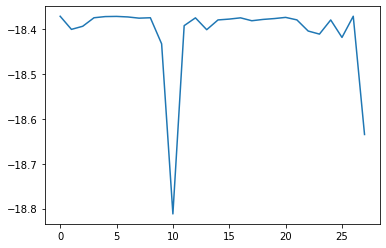

In [193]:
print(np.max(Evidence), pairs[np.argmax(Evidence)])
print(np.min(Evidence), pairs[np.argmin(Evidence)])
plt.plot(Evidence)

### Conclusion
The model evidences show us that the best model is based on predictors Petrol_Fraction and UK_Population

In [208]:
#Evidence_table = pd.DataFrame([np.array(pairs),Evidence], columns = ['Evidence', 'Predictors'])
model_evidence = pd.DataFrame([[a,b] for a,b in zip(pairs,Evidence)], 
                              columns = ['Predictors','Evidence']).sort_values('Evidence', axis = 0, 
                                                                               ascending = False)
model_evidence.head()

,Predictors,Evidence
26,"[Petrol_Fraction, UK_Population]",-18.371577
0,"[All_Electric, Diesel]",-18.371610
5,"[All_Electric, Total_Vehicles]",-18.371942
4,"[All_Electric, Petrol_Fraction]",-18.372326
6,"[All_Electric, UK_Population]",-18.373138


## Linear Regression with the best predictors

In [206]:
#Set up model (X) and y
predictors = ['UK_Population', 'Petrol_Fraction']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Total_GHGs']

results = LRST451(X,y,predictors)
results

,beta,se,lower 95% bound,upper 95% bound
UK_Population,-3.390268,0.876221,-5.410837,-1.369699
Petrol_Fraction,-3.018641,0.876221,-5.039211,-0.998072


In [209]:
#Set up model (X) and y
predictors = ['All_Electric', 'Diesel']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Total_GHGs']

results = LRST451(X,y,predictors)
results

,beta,se,lower 95% bound,upper 95% bound
All_Electric,-1.459523,0.382561,-2.341710,-0.577336
Diesel,0.951163,0.382561,0.068976,1.833350


In [210]:
#Set up model (X) and y
predictors = ['All_Electric', 'Total_Vehicles']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Total_GHGs']

results = LRST451(X,y,predictors)
results

,beta,se,lower 95% bound,upper 95% bound
All_Electric,-2.280532,0.622857,-3.716844,-0.844221
Total_Vehicles,1.713229,0.622857,0.276918,3.149540


## Model Evidence for predicting Average_CO2

In [211]:
predictors = sorted(['Petrol', 'Diesel','Total_Vehicles', 'UK_Population', 'Petrol_Fraction',
                    'Low_Emission_Total', 'LE_Fraction', 'All_Electric'])

pairs = [[a,b] for a in predictors for b in predictors if a<b]

y = standard_data['Average_CO2']
a_0 = 0.1
b_0 = 0.1
N = 10000 #Monte Carlo sample size
#nPowers = np.array([2,3,4,5,6])
#K = nPowers.size
K = len(pairs)
Evidence_AvgCO2 = np.ones(K)

for i in range(K):
    predictors = pairs[i]
    X = standard_data[predictors]
    n,p = X.shape
    mu_0 = np.zeros(p)
    XtX = X.T.dot(X)
    Om_0_inv = XtX/n #unit information prior
    results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
    Evidence_AvgCO2[i] = ModEvidence(X,y,mu_n,Om_n,mu_0,Om_0_inv,a_n,b_n,a_0,b_0)

-18.40245824990457 ['LE_Fraction', 'Low_Emission_Total']
-18.435211075072125 ['All_Electric', 'Diesel']


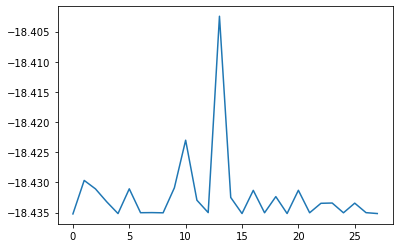

In [212]:
print(np.max(Evidence_AvgCO2), pairs[np.argmax(Evidence_AvgCO2)])
print(np.min(Evidence_AvgCO2), pairs[np.argmin(Evidence_AvgCO2)])
plt.plot(Evidence_AvgCO2)

In [214]:
#Evidence_table = pd.DataFrame([np.array(pairs),Evidence], columns = ['Evidence', 'Predictors'])
model_evidence_avgco2 = pd.DataFrame([[a,b] for a,b in zip(pairs,Evidence_AvgCO2)], 
                              columns = ['Predictors','Evidence_AvgCO2']).sort_values('Evidence_AvgCO2', axis = 0, 
                                                                               ascending = False)
model_evidence_avgco2

,Predictors,Evidence_AvgCO2
13,"[LE_Fraction, Low_Emission_Total]",-18.402458
10,"[Diesel, Petrol_Fraction]",-18.422998
1,"[All_Electric, LE_Fraction]",-18.429661
9,"[Diesel, Petrol]",-18.430885
5,"[All_Electric, Total_Vehicles]",-18.431053
2,"[All_Electric, Low_Emission_Total]",-18.431063
20,"[Low_Emission_Total, Total_Vehicles]",-18.431298
16,"[LE_Fraction, Total_Vehicles]",-18.431310
18,"[Low_Emission_Total, Petrol]",-18.432347
14,"[LE_Fraction, Petrol]",-18.432486


In [215]:
#Set up model (X) and y
predictors = ['All_Electric', 'Total_Vehicles']
#lam=0.001#np.exp(-100)

X = standard_data[predictors]
y = standard_data['Average_CO2']

results = LRST451(X,y,predictors)
results

,beta,se,lower 95% bound,upper 95% bound
All_Electric,0.048226,0.125001,-0.240026,0.336479
Total_Vehicles,-1.039776,0.125001,-1.328028,-0.751524
